<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Infosys_Industry_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Arnav, Narendra

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [193]:
# User input for asset/company
asset_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix): ").upper()
print(f"\nData analysis will be performed for: {asset_name}")

Enter the company name (e.g., Infosys, Rakuten, Netflix): rakuten

Data analysis will be performed for: RAKUTEN


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [194]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [195]:
def get_company_summary(company_name):
    try:
        # Search Wikipedia for the company
        search_results = wikipedia.search(company_name)

        if not search_results:
            return f"No Wikipedia pages found for {company_name}"

        # Keywords to detect company pages
        company_keywords = ["company", "corporation", "limited", "ltd", "group", "services", "bank", "motor", "industries", "technology"]

        # Try to find the best company-related page
        best_match = None
        for result in search_results:
            lower = result.lower()
            if any(keyword in lower for keyword in company_keywords):
                best_match = result
                break

        # If no match found, pick the first result
        if not best_match:
            best_match = search_results[0]

        # Fetch summary
        summary = wikipedia.summary(best_match, sentences=10)
        return summary

    except wikipedia.exceptions.DisambiguationError as e:
        # Pick first meaningful option
        option = e.options[0]
        summary = wikipedia.summary(option, sentences=10)
        return summary

    except Exception as e:
        return f"Error fetching summary: {e}"

# Usage:
print(get_company_summary(asset_name))


Rakuten Group, Inc. (楽天グループ株式会社, Rakuten Gurūpu kabushikigaisha; pronounced [ɾakɯ̥teɴ], lit. 'Optimism') is a Japanese technology conglomerate based in Tokyo, founded by Hiroshi Mikitani in 1997. Centered around the online retail marketplace Rakuten Ichiba, its businesses include financial services utilizing Fintech, digital content and communications services such as the messaging app Viber, e-book distributor Kobo, and Japan's fourth-most used mobile carrier, Rakuten Mobile. Rakuten has more than 28,000 employees worldwide, operating in 30 countries and regions, and its revenues totalling US $12.8 billion as of 2021. Rakuten was the official sponsor of the Spanish football club FC Barcelona from 2017 until 2022, and the Golden State Warriors of the NBA as of 2022. It is sometimes referred to as the "Amazon of Japan".
Some past significant investments include Buy.com (now Rakuten.com in the US), Priceminister (France, now Rakuten.fr), Ikeda, Tradoria, Play.com, Wuaki.tv, Pinterest, Eb

## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [196]:
try:
    ticker = yf.Ticker(asset_name if asset_name.upper() in ["BTC-USD","TSLA","AAPL"] else "BTC-USD")
    market_data = ticker.history(period="1mo", interval="1d")
    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {asset_name}:")
    display(market_data.head())
except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")


 Market Data Sample for RAKUTEN:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-10-09 00:00:00+00:00,123337.070312,123739.343750,119812.031250,121705.585938,74653009425,0.0,0.0
1,2025-10-10 00:00:00+00:00,121704.742188,122509.664062,104582.414062,113214.367188,153125018868,0.0,0.0
2,2025-10-11 00:00:00+00:00,113236.429688,113429.726562,109760.562500,110807.882812,110236934340,0.0,0.0
3,2025-10-12 00:00:00+00:00,110811.515625,115805.062500,109715.539062,115169.765625,93710414091,0.0,0.0
4,2025-10-13 00:00:00+00:00,115161.679688,116020.484375,113821.187500,115271.078125,71582026739,0.0,0.0


## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [197]:
# Construct RSS feed URL for Google News
company_name=asset_name.replace(" ", "");
rss_url = f"https://news.google.com/rss/search?q={company_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {asset_name}:")
display(news_df)


 Top 10 News Headlines for RAKUTEN:


,Title,Link,Published
0,You Can Now Turn Your Rakuten Cash Back into B...,https://news.google.com/rss/articles/CBMiUkFVX...,"Thu, 06 Nov 2025 14:03:18 GMT"
1,Bilt and Rakuten Team Up to Help Shoppers Stre...,https://news.google.com/rss/articles/CBMijgFBV...,"Thu, 06 Nov 2025 14:00:00 GMT"
2,Bilt and Rakuten Integrate Rewards Programs - ...,https://news.google.com/rss/articles/CBMijgFBV...,"Thu, 06 Nov 2025 22:44:19 GMT"
3,Convert Rakuten cash-back rewards into Bilt Re...,https://news.google.com/rss/articles/CBMiZkFVX...,"Thu, 06 Nov 2025 15:29:18 GMT"
4,Rakuten Points Can Now Be Converted to Bilt — ...,https://news.google.com/rss/articles/CBMiTkFVX...,"Thu, 06 Nov 2025 14:05:24 GMT"
5,Bilt brings opportunity cost front-and-center ...,https://news.google.com/rss/articles/CBMiogFBV...,"Fri, 07 Nov 2025 12:09:43 GMT"
6,Bilt Members Can Now Earn Points Through Rakut...,https://news.google.com/rss/articles/CBMif0FVX...,"Thu, 06 Nov 2025 14:01:00 GMT"
7,Bilt Rewards partners with Rakuten to bring po...,https://news.google.com/rss/articles/CBMirwFBV...,"Thu, 06 Nov 2025 14:05:00 GMT"
8,Earn 15% cash back at Lululemon with Rakuten -...,https://news.google.com/rss/articles/CBMibEFVX...,"Thu, 06 Nov 2025 14:34:08 GMT"
9,Rakuten Group (TSE:4755): Evaluating Valuation...,https://news.google.com/rss/articles/CBMihgFBV...,"Sun, 09 Nov 2025 02:10:00 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [198]:
fake = Faker()
positive_phrases = [
    f"{asset_name} is surging! 🚀",
    f"Profits from {asset_name} are amazing!",
    f"Holding {asset_name} long-term, confident.",
    f"{asset_name} adoption is growing worldwide!",
    f"Investors are optimistic about {asset_name}."
]

negative_phrases = [
    f"Worried about {asset_name} volatility.",
    f"{asset_name} might crash soon.",
    f"{asset_name}'s future is uncertain.",
    f"High risks in {asset_name} investments.",
    f"{asset_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{asset_name} price remains stable today.",
    f"Market watching {asset_name} closely.",
    f"{asset_name} updates coming soon.",
    f"{asset_name} performance unchanged.",
    f"Analysts report on {asset_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,"Holding RAKUTEN long-term, confident."
1,Investors are optimistic about RAKUTEN.
2,Profits from RAKUTEN are amazing!
3,RAKUTEN's future is uncertain.
4,Market watching RAKUTEN closely.


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [199]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,"Holding RAKUTEN long-term, confident.",0.50,Positive
1,Investors are optimistic about RAKUTEN.,0.00,Neutral
2,Profits from RAKUTEN are amazing!,0.75,Positive
3,RAKUTEN's future is uncertain.,0.00,Neutral
4,Market watching RAKUTEN closely.,0.00,Neutral


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

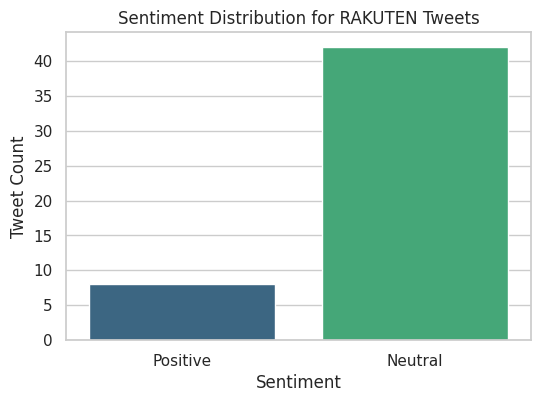

In [200]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {asset_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


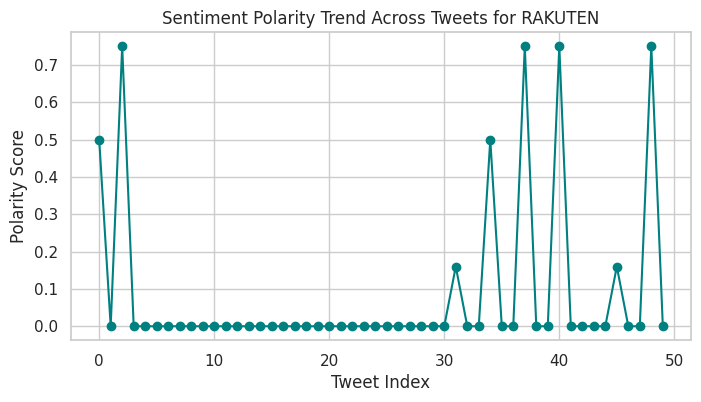

In [201]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {asset_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


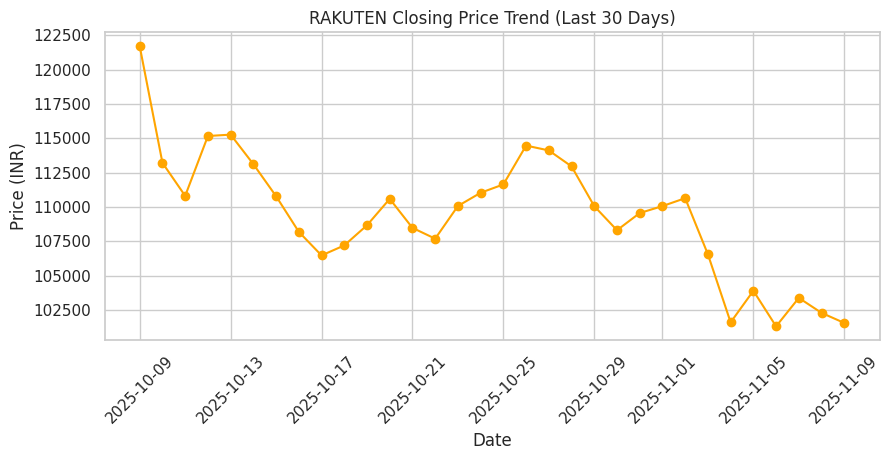

In [202]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{asset_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Using Alpha Vantage for Stock Data


First, install the library:

In [203]:
!pip install alpha_vantage

### Analyze Alpha Vantage Data
Here are some descriptive statistics for the Alpha Vantage data:

In [204]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
from google.colab import userdata

API_KEY = userdata.get('ALPHA_VANTAGE_API')
def detect_symbol(asset_name: str) -> str:
    """
    Maps common company/asset names to their typical stock or crypto symbols.
    If no match is found, the name itself is returned as the potential symbol.
    """
    mapping = {
        "BITCOIN": "BTCUSD",
        "TESLA": "TSLA",
        "INFOSYS": "INFY",
        "RAKUTEN": "RKUNY",
        "NETFLIX": "NFLX",
        "TCS": "TCS",  # NSE symbol for Tata Consultancy Services
    }
    # Return the mapped symbol or the original name (converted to uppercase for robustness)
    return mapping.get(asset_name.upper(), asset_name.upper())

    # --- Core Trend Analysis Logic ---
def get_trend(df: pd.DataFrame) -> tuple[str, str]:
    """
    Calculates 20-day and 50-day Simple Moving Averages (SMA) to determine
    the market trend (Bullish, Bearish, or Sideways).
    The '4. close' column is used for calculations.
    """
    df = df.copy()

    # Check for minimum data requirement for a reliable 50-day SMA
    if len(df) < 50:
        return "⚠️ Insufficient Data", "Cannot calculate trend (needs at least 50 days of data)"

    # Calculate SMAs
    # Note: rolling() automatically aligns the mean to the end of the window
    df['SMA20'] = df['4. close'].rolling(window=20).mean()
    df['SMA50'] = df['4. close'].rolling(window=50).mean()

    # Get the latest calculated values
    latest = df.iloc[-1]

    # Handle potential NaN values (occurs if the window is not yet full)
    if pd.isna(latest['SMA20']) or pd.isna(latest['SMA50']):
         return "⚠️ Data Not Yet Complete", "Need more data points for rolling average calculation"

    # Compare SMAs (Golden Cross / Death Cross strategy)
    if latest['SMA20'] > latest['SMA50']:
        return "✅ Bullish Trend", "The short-term trend (SMA20) is above the long-term trend (SMA50). Potential Uptrend."
    elif latest['SMA20'] < latest['SMA50']:
        return "❌ Bearish Trend", "The short-term trend (SMA20) is below the long-term trend (SMA50). Potential Downtrend."
    else:
        return "↔️ Sideways Market", "SMAs are crossing or are too close. Neutral — Wait for a breakout."

# --- Main Execution Block ---
def run_analysis():
    """
    Main function to ask for user input, fetch data, and print the analysis.
    """
    if not API_KEY:
        print("\n❌ Error: ALPHA_VANTAGE_API_KEY is not configured.")
        print("Please set the 'ALPHA_VANTAGE_API_KEY' secret in your environment.")
        return

    # --- ASK USER ---
    try:
        # company_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): ")
        company_name=asset_name
    except EOFError:
        # Handle non-interactive environments by using a default
        company_name = "TESLA"
        print(f"Non-interactive environment detected. Using default company: {company_name}")


    if not company_name:
        print("Analysis cancelled: Company name cannot be empty.")
        return

    print(f"\nData analysis will be performed for: {company_name}")

    # --- SYMBOL DETECTION ---
    symbol = detect_symbol(company_name)
    print(f"Using symbol: {symbol}")

    # --- FETCH & PROCESS ---
    try:
        # Initialize the TimeSeries client
        # output_format='pandas' is essential for DataFrame operations
        ts = TimeSeries(key=API_KEY, output_format='pandas')

        # Fetch daily data (compact size fetches 100 data points, good for 50-day SMA)
        data, meta = ts.get_daily(symbol=symbol, outputsize='compact')
        # Alpha Vantage returns data newest-first, so sort the index (date) oldest-first
        data = data.sort_index()
        # print(data)

        print(f"\n📊 Latest Market Data for {company_name} ({symbol}):")
        # Display the last 3 days of data for review
        print(data[['4. close']].tail(3).to_markdown(numalign="left", stralign="left"))

        # Perform the trend analysis
        trend, decision = get_trend(data)

        # Output the results
        print("\n--- Analysis Result ---")
        print(f"Asset: {company_name} ({symbol})")
        print(f"📌 Trend Status: {trend}")
        print(f"🧾 Decision: {decision}")
        print("-----------------------")

    except ValueError as ve:
        # Alpha Vantage throws ValueError on invalid symbol or API key issues
        print(f"\n❌ Error fetching data for {company_name} ({symbol}):")
        print(f"    Details: {ve}")
        print("    Suggestion: Check if the symbol is correct and if the API key is valid.")

    except Exception as e:
        print(f"\n❌ An unexpected error occurred: {e}")

if __name__ == "__main__":
    run_analysis()


Data analysis will be performed for: RAKUTEN
Using symbol: RKUNY

📊 Latest Market Data for RAKUTEN (RKUNY):
| date                | 4. close   |
|:--------------------|:-----------|
| 2025-11-05 00:00:00 | 6.445      |
| 2025-11-06 00:00:00 | 6.55       |
| 2025-11-07 00:00:00 | 6.61       |

--- Analysis Result ---
Asset: RAKUTEN (RKUNY)
📌 Trend Status: ✅ Bullish Trend
🧾 Decision: The short-term trend (SMA20) is above the long-term trend (SMA50). Potential Uptrend.
-----------------------


Now, let's visualize the closing price over time:



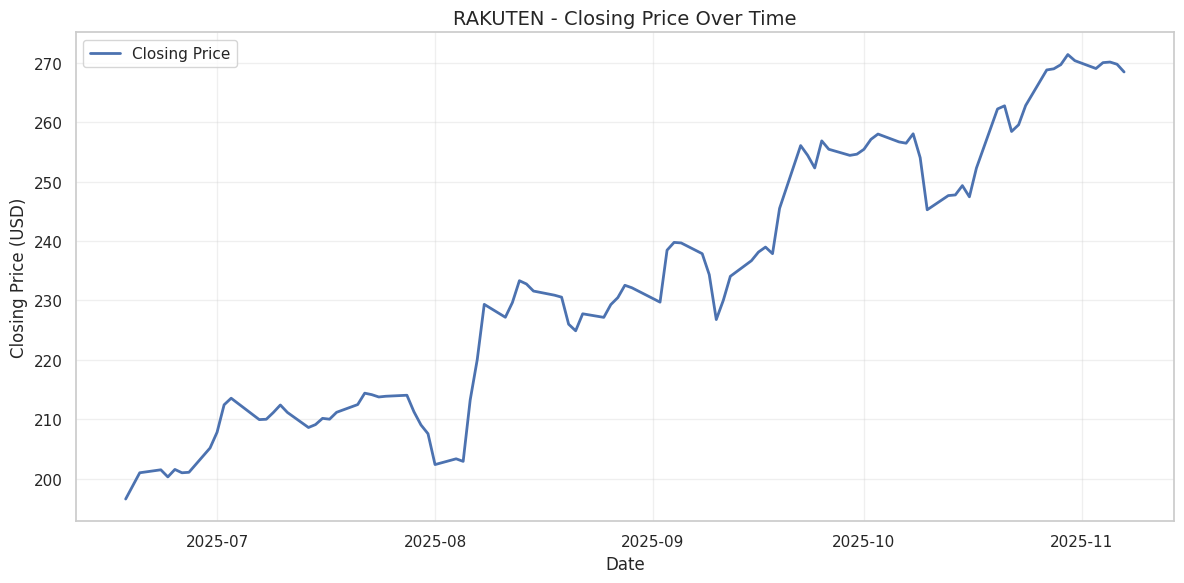

In [205]:
# Ensure data exists
if 'data' in locals() :
  plt.figure(figsize=(12,6))
  plt.plot(data.index, data['4. close'], label='Closing Price', linewidth=2)

  plt.title(f"{company_name} - Closing Price Over Time", fontsize=14)
  plt.xlabel("Date", fontsize=12)
  plt.ylabel("Closing Price (USD)", fontsize=12)
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")

In [206]:
import plotly.graph_objects as go
# Ensure data is available
if 'data' in locals() and not data.empty:
    fig = go.Figure(data=[
        go.Candlestick(
            x=data.index,
            open=data['1. open'],
            high=data['2. high'],
            low=data['3. low'],
            close=data['4. close'],
            name=f"{company_name}"
        )
    ])

    fig.update_layout(
        title=f"{company_name} - Candlestick Chart",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        xaxis_rangeslider_visible=False,
        template="plotly_white",
        width=950,
        height=550
    )

    fig.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")
